In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv(r'dummycsv.csv')
df.head()

,temperature,humidity,methane,Smoke
0,58,5,66,1
1,62,2,54,1
2,46,29,8,0
3,20,67,7,0
4,88,4,61,1


In [10]:
x=df.drop('Smoke',axis=1)
x.head()

,temperature,humidity,methane
0,58,5,66
1,62,2,54
2,46,29,8
3,20,67,7
4,88,4,61


In [9]:
y=df['Smoke']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Smoke, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

c:\Users\kapoo\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.4024054824655767

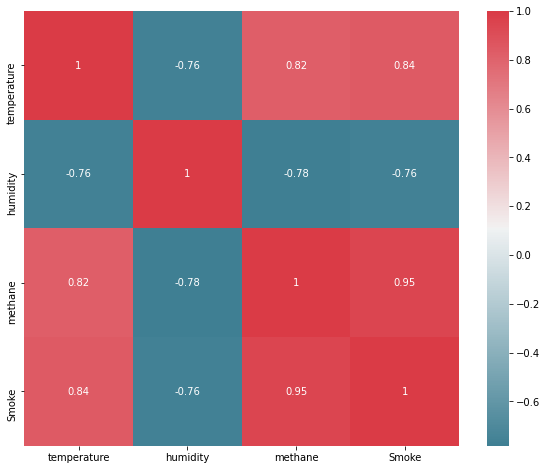

In [14]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr ), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

In [15]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test,supportvector_regressor)

Mean Absolute Error: 0.12008777724999505
Mean Squared Error: 0.020251725417761244
Root Mean Squared Error: 0.14230855707848789
Mean Absolute Error: 0.045572767660981645
Mean Squared Error: 0.0028253854074286678
Root Mean Squared Error: 0.05315435454813338


In [17]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [18]:
#Saving Scikitlearn models
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(random_forest,file)


In [19]:
with open('model_pickle','rb') as file:
    bmp = pickle.load(file)

In [20]:
bmp.predict(X_test)

array([1., 0., 1., ..., 1., 1., 1.])

In [21]:
bmp.score(X_test,y_test)

1.0